In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv("crop_production.csv")


In [20]:
df.dropna(subset=['Production'], inplace=True)

In [21]:
df_numeric = df.select_dtypes(include=[np.number])

In [22]:
df_numeric = df.select_dtypes(include=[np.number]).copy()  # Creates an independent copy



In [23]:
df_numeric.loc[:, :] = df_numeric.replace([np.inf, -np.inf], np.nan)
df_numeric.dropna(inplace=True)


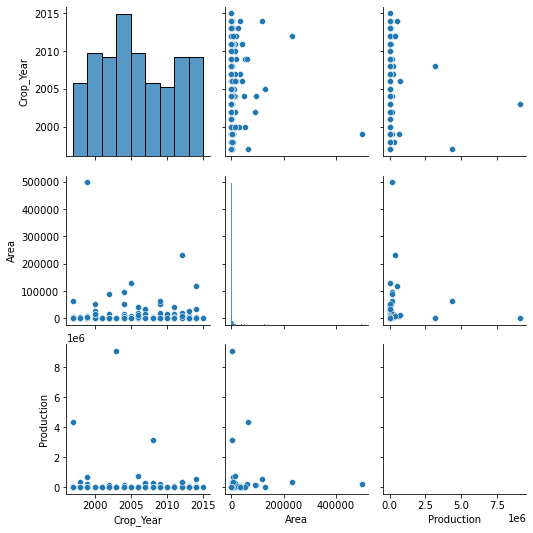

In [24]:
sns.pairplot(df_numeric.sample(200))  # Sample 200 rows to prevent freezing
plt.show()

In [25]:
# Step 6: Define Features (X) and Target (y)
X = df_numeric.drop(columns=['Production'])  # Features
y = df_numeric['Production']  # Target variable

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
# Step 9: Train Random Forest Model (Improvement Step)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)

In [30]:
# Step 11: Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 478621956064901.06
R-squared Score: -0.18960224590355335


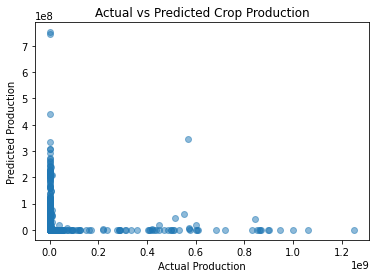

In [31]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Production")
plt.show()


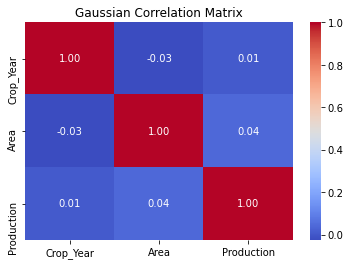

In [32]:
# Step 13: Generate Gaussian Matrix (Correlation Matrix)
gaussian_matrix = df_numeric.corr()
sns.heatmap(gaussian_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Gaussian Correlation Matrix")
plt.show()

In [33]:
future_data = np.array([[2025, 50000]])  # Example future input (Year, Area)
future_data_scaled = scaler.transform(future_data)  # Scale input
future_prediction = rf_model.predict(future_data_scaled)
print(f"Predicted Crop Production for 2025 and 50,000 Area: {future_prediction[0]}")

Predicted Crop Production for 2025 and 50,000 Area: 63475.22
